In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('model_data.csv')

In [3]:
X = df.drop(['rent'],axis=1)

In [4]:
y = df['rent']

In [5]:
X

,bedroom,bathrooms,area,deposit_amt,"Bramhacorp F Residences, Kalyani Nagar, , Pune, Maharashtra","Clover Village, Wanowrie, , Pune, Maharashtra","Devi Sacred Heart Town, Wanwadi, , Pune, Maharashtra","Dreams Aakruti, Hadapsar, , Pune, Maharashtra","Duville Riverdale Heights, Kharadi, , Pune, Maharashtra","Forest County, Kharadi, , Pune, Maharashtra",...,"Nyati Elysia, Kharadi, , Pune, Maharashtra","Paranjape Blue Ridge, Hinjewadi, , Pune, Maharashtra","Pristine Prolife, Wakad, , Pune, Maharashtra","Raheja Vistas Phase 2, NIBM, , Pune, Maharashtra","Rohan Abhilasha, Wagholi, , Pune, Maharashtra","Siddhashila Eela, Punawale, , Pune, Maharashtra","Sudhir Mandke Advantage Homes, Lullanagar, , Pune, Maharashtra","TCG The Cliff Garden, Phase-3 Hinjewadi , , Pune, Maharashtra","Xrbia City, Hinjewadi, , Pune, Maharashtra","Xrbia Hinjewadi, Hinjewadi, , Pune, Maharashtra"
0,2,2,1050.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2,760.0,40000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,628.0,40000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,2,668.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,2,950.0,50000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6690,2,2,805.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6691,2,1,900.0,45000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6692,2,1,750.0,30000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6693,2,2,563.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# plt.scatter(X.bedroom,y)
# plt.plot(X.area,y,color='red')

In [7]:
X.shape

(6695, 40)

In [8]:
# X = np.array(X)

In [9]:
type(X)

pandas.core.frame.DataFrame

In [10]:
# X[0]

In [11]:
type(y)

pandas.core.series.Series

In [12]:
# y = np.array(y)

In [13]:
type(y)

pandas.core.series.Series

In [14]:
# y[0]

## PCA

In [15]:
# from sklearn.decomposition import PCA

In [16]:
# pca = PCA(0.95)

In [17]:
# X_pca = pca.fit_transform(X)

In [18]:
# X_pca.shape

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Scalling data

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler = MinMaxScaler()

In [23]:
X_train_scalled = scaler.fit_transform(X_train.astype(np.float64))

In [24]:
X_test_scalled = scaler.fit_transform(X_test.astype(np.float64))

In [25]:
X_train_scalled.shape

(4686, 40)

In [26]:
type(X_train_scalled)

numpy.ndarray

In [27]:
y_train = y_train.astype(np.float64)

In [28]:
y_test = y_test.astype(np.float64)

## Model 

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam

In [65]:
model = Sequential()

model.add(Dense(40,input_shape=(40,))) 
model.add(Activation('relu'))

model.add(Dense(128)) 
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(64)) 
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(64)) 
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(64)) 
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(64)) 
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Dense(128)) 
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Dense(1))

model.compile(optimizer= Adam(learning_rate=0.001),
              loss='mean_squared_error',
              metrics=['mean_squared_error'])


In [66]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 40)                1640      
                                                                 
 activation_15 (Activation)  (None, 40)                0         
                                                                 
 dense_17 (Dense)            (None, 128)               5248      
                                                                 
 activation_16 (Activation)  (None, 128)               0         
                                                                 
 dropout_12 (Dropout)        (None, 128)               0         
                                                                 
 dense_18 (Dense)            (None, 64)                8256      
                                                                 
 activation_17 (Activation)  (None, 64)               

In [67]:
from tensorflow.keras.callbacks import EarlyStopping

In [68]:
early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [69]:
model.fit(x=X_train_scalled,y= y_train,batch_size=32,epochs=10)

Epoch 1/10
147/147 [==============================] - 3s 4ms/step - loss: 153846640.0000 - mean_squared_error: 153846640.0000
Epoch 2/10
147/147 [==============================] - 1s 4ms/step - loss: 35333424.0000 - mean_squared_error: 35333424.0000
Epoch 3/10
147/147 [==============================] - 1s 4ms/step - loss: 34422696.0000 - mean_squared_error: 34422696.0000
Epoch 4/10
147/147 [==============================] - 1s 4ms/step - loss: 34682288.0000 - mean_squared_error: 34682288.0000
Epoch 5/10
147/147 [==============================] - 1s 4ms/step - loss: 33743008.0000 - mean_squared_error: 33743008.0000
Epoch 6/10
147/147 [==============================] - 1s 4ms/step - loss: 33680156.0000 - mean_squared_error: 33680156.0000
Epoch 7/10
147/147 [==============================] - 1s 4ms/step - loss: 32533326.0000 - mean_squared_error: 32533326.0000
Epoch 8/10
147/147 [==============================] - 1s 4ms/step - loss: 33433462.0000 - mean_squared_error: 33433462.0000
Epoch 

In [59]:
X_train.shape[1]

40

In [60]:
losses = pd.DataFrame(model.history.history)

<Axes: >

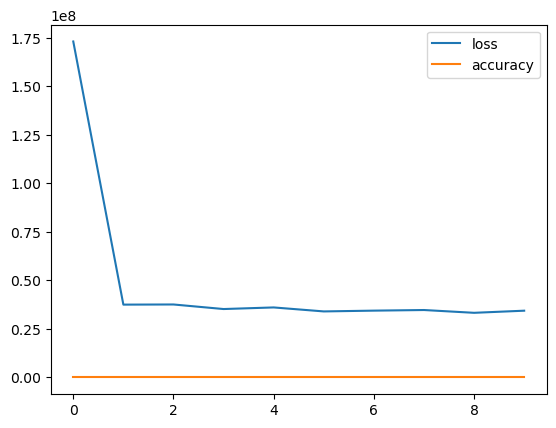

In [61]:
losses.plot()

In [62]:
y_pred = model.predict(X_test_scalled)

63/63 [==============================] - 0s 2ms/step


In [63]:
from sklearn.metrics import r2_score

In [64]:
r2_score(y_test,y_pred)

0.6050418980149928

## Linear Reg

In [43]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train_scalled, y_train)

LinearRegression()

In [44]:
regressor.score(X_test_scalled,y_test)

0.5909182678448965

In [45]:
from sklearn.linear_model import Ridge

In [46]:
ridge = Ridge(alpha=1)
ridge.fit(X_train_scalled, y_train)

Ridge(alpha=1)

In [47]:
ridge.score(X_test_scalled,y_test)

0.5925426713161632

In [48]:
y_pred = regressor.predict(X_test_scalled)

In [49]:
from sklearn.metrics import r2_score

In [50]:
r2_score(y_test,y_pred)

0.5909182678448965